In [1]:
# Use linear regression to see if AWSSI as a single feature can be used to predict alcoholism admissions 

#### Section 1. Linear regression using only the primary feature, AWSSI: Can it be used to predict alcoholism admissions?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline


In [3]:
df = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/consol_correl_vars", compression='infer')
df.head()

,AWSSI,TempScore,SnowScore,Length,start_scale,end_scale,Total_Admits,male,female,white,black,No_HS_degree,HS_grad,college,nvr_mrrd,some_marriage,working,no_work
0,440,335,105,159,40,118,29526,22460,7066,23985,3636,9956.0,13671,5896,15265,14257,7705,21820
1,788,364,424,164,36,127,31541,24161,7380,25577,3707,10435.0,14632,6470,16301,15235,8248,23292
2,1052,426,626,127,27,99,32210,24770,7440,25966,3736,10387.0,15203,6611,16775,15430,9067,23142
3,369,279,90,134,28,105,33411,25574,7837,25781,4526,10707.0,15791,6908,17966,15443,8912,24498
4,1090,400,690,153,38,114,34559,26205,8354,26976,4552,10948.0,16256,7354,19072,15485,9329,25230


In [4]:
df.dtypes

AWSSI              int64
TempScore          int64
SnowScore          int64
Length             int64
start_scale        int32
end_scale          int32
Total_Admits       int64
male               int64
female             int64
white              int64
black              int64
No_HS_degree     float64
HS_grad            int64
college            int64
nvr_mrrd           int64
some_marriage      int64
working            int64
no_work            int64
dtype: object

In [5]:
df.shape

(23, 18)

In [6]:
X = df.drop(df.columns[4], axis=1).values 
y = df['Total_Admits'].values

In [7]:
print(X)


[[   440.    335.    105.    159.    118.  29526.  22460.   7066.  23985.
    3636.   9956.  13671.   5896.  15265.  14257.   7705.  21820.]
 [   788.    364.    424.    164.    127.  31541.  24161.   7380.  25577.
    3707.  10435.  14632.   6470.  16301.  15235.   8248.  23292.]
 [  1052.    426.    626.    127.     99.  32210.  24770.   7440.  25966.
    3736.  10387.  15203.   6611.  16775.  15430.   9067.  23142.]
 [   369.    279.     90.    134.    105.  33411.  25574.   7837.  25781.
    4526.  10707.  15791.   6908.  17966.  15443.   8912.  24498.]
 [  1090.    400.    690.    153.    114.  34559.  26205.   8354.  26976.
    4552.  10948.  16256.   7354.  19072.  15485.   9329.  25230.]
 [   501.    282.    219.    146.    109.  35083.  26633.   8450.  28223.
    4075.  10720.  16930.   7425.  19183.  15896.  10383.  24699.]
 [   447.    202.    245.    148.    110.  32965.  25099.   7866.  26130.
    4159.   9701.  16027.   7231.  18414.  14550.   9515.  23450.]
 [   443.    

In [8]:
# slice out weather scale predictor variable
X_AWSSI = X[:,0] 

In [9]:
print(X_AWSSI)

[  440.   788.  1052.   369.  1090.   501.   447.   443.   531.   929.
   313.  1196.   674.  1012.   510.   413.   595.   805.   563.   998.
   260.   627.   892.]


In [10]:
# some quality control

type(X_AWSSI), type(y) 

(numpy.ndarray, numpy.ndarray)

In [11]:
# format arrays for analysis

print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X_AWSSI before reshaping: {}".format(X_AWSSI.shape))

Dimensions of y before reshaping: (23,)
Dimensions of X_AWSSI before reshaping: (23,)


In [12]:
# continued 

y = y.reshape(-1, 1) 
X_AWSSI = X_AWSSI.reshape(-1, 1)

In [13]:
# Print the dimensions of X and y after reshaping

print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X_AWSSI after reshaping: {}".format(X_AWSSI.shape))

Dimensions of y after reshaping: (23, 1)
Dimensions of X_AWSSI after reshaping: (23, 1)


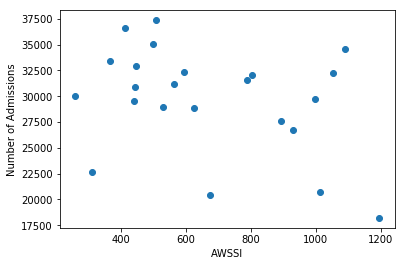

In [14]:
#  fit a linear regression and predict alcoholisim admissions using one feature, the winter weather index

plt.scatter(X_AWSSI, y) 
plt.ylabel('Number of Admissions') 
plt.xlabel('AWSSI') 
plt.show()


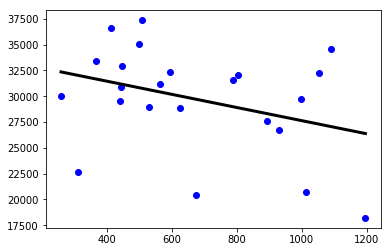

In [15]:
"""Fit a regression model. Create a regressor: reg, create the prediction space, fit the model to the data,
compute predictions over the prediction space, and plot the regression line."""

from sklearn import linear_model 
reg = linear_model.LinearRegression() 
reg.fit(X_AWSSI, y) 

prediction_space = np.linspace(min(X_AWSSI),  
                          max(X_AWSSI)).reshape(-1, 1) 
plt.scatter(X_AWSSI, y, color='blue') 
plt.plot(prediction_space, reg.predict(prediction_space),
   color='black', linewidth=3) 
plt.show()f


Interpretation: the above illustrates that my one-feature data are sparse and not especially predictive. The regression line of predictions does not capture the data trend. The model does not perform well. 

###### 1a. Evaluate the model by its score, R^2: 

In [16]:
print("One feature linear regression R^2: {:.2f}".format(reg.score(X_AWSSI, y)))

One feature linear regression R^2: 0.12


######  R^2 for linear regression with primary feature, AWSSI: 0.12
##### 1a interpretation:  R^2 value for linear regression with AWSSI feature, the overall winter severity index, indicates very little variance in the target is predicted by the feature.

##### 1b. Evaluate the model by how it performs on a test set after being trained:

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [18]:
X = X_AWSSI 

In [19]:
X, y = X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)


In [20]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.12
Test set score: -0.01


###### Training set score: 0.12
###### Test set score: -0.01

##### 1b Interpretation: Training score (the R^2)  is higher than test set score, and test score is nonexistent, i.e., zero.

##### 1c. What are the linear regression slope and intercept values?

In [21]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[-5.94067033]]
lr.intercept_: [ 34403.9199438]


###### lr.coef_: [[-5.94067033]]
###### lr.intercept_: [ 34403.9199438]

##### 1c Interpretation: Negative value on the coefficient reflects negative relationship, i.e., less severe winters correspond to greater admissions for alcoholism

#### Conclusion for 1, linear regression using only the primary feature, AWSSI:
#### The winter severity index alone has no value as a predictive algorithm for alcoholism admissions. 

#### Section 2: Use ordinary least square regression to see if a model incorporating more than one feature can be used to predict alcoholism admissions

In [22]:
# Modify dataframe for initial regression with all features

df.dtypes

AWSSI              int64
TempScore          int64
SnowScore          int64
Length             int64
start_scale        int32
end_scale          int32
Total_Admits       int64
male               int64
female             int64
white              int64
black              int64
No_HS_degree     float64
HS_grad            int64
college            int64
nvr_mrrd           int64
some_marriage      int64
working            int64
no_work            int64
dtype: object

In [23]:
df.drop(df.iloc[:, 7:18], inplace=True, axis=1)

In [24]:
df.dtypes

AWSSI           int64
TempScore       int64
SnowScore       int64
Length          int64
start_scale     int32
end_scale       int32
Total_Admits    int64
dtype: object

In [25]:
# write a pickle of features and main target

df.to_pickle ("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_feats_1_targ", compression='infer', protocol=4)

##### 2a. Linear regression using all features indiscriminately, assessed by R^2:

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(df.columns[6], axis=1).values 
y = df['Total_Admits'].values
type(X), type(y) 

(numpy.ndarray, numpy.ndarray)

In [28]:
y = y.reshape(-1, 1) 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [30]:
reg_all = LinearRegression()

In [31]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred = reg_all.predict(X_test)

In [33]:
print("R^2: {:.2f}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))


R^2: -0.03
Root Mean Squared Error: 4712.46


##### 2a  Linear regression using all available features indiscriminantly, results and interpretation
##### This model performed abysmally: R^2: -0.03
###### Root Mean Squared Error provides an absolute measure of fit. It is the standard deviation of the differences between predicted values and observed values in the same units as the response variable -- in this case, in units of admissions for alcoholism.
###### Here, at 4712, it is quite high, given  overall annual admits that range from 18,000 to 35,000.

##### 2b. Linear regression using all features, what are the coefficients, intercept, and training/test results?

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [35]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[ -5.99730677 -11.61029888   5.61299211 -70.93744942 -76.92858979
    5.99114038]]
lr.intercept_: [ 48716.85731591]


###### The slopes for the features are:
###### AWSSI    -6
###### TempScore    -11.61
###### SnowScore    5.61
###### Length    -70.94
###### Start_scale  -76.93  
###### End_scale    6

###### The intercept is: 48716.86

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.34
Test set score: -0.14


##### 2b Interpretation: Relative to linear regression using only one feature, using all available features increases the training set score, as would be expected with a more complex model that more accurately describes the specific characteristics of the training sample, but does poorly on another sample, i.e., the test data. This is because the model overfits to the training set, and is not generalizable to the test set, or other data. 

#### 3. Ridge regression

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

In [39]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.34
Test set score: -0.14


In [40]:
ridge.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
ridge_pred = ridge.predict(X_test)

In [42]:
ridge.score(X_test, y_test) 

-0.1434261682740563

##### 3. Ridge regression results and interpretation:
###### Training set score: 0.34
###### Test set score: -0.14
###### R^2: -0.11
###### Ridge regression train/test scores are identical to linear regression using all available features indiscriminately. This is likely because both linear regression and ridge regression are not able to learn with the scant data in this study.
###### Once again, the R^2 score is so low as to make comparisons with other model R^2 meaningless.

#### 4a. Lasso regression

In [43]:
from sklearn.linear_model import Lasso 

In [44]:
names = df.drop('Total_Admits', axis=1).columns 

C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


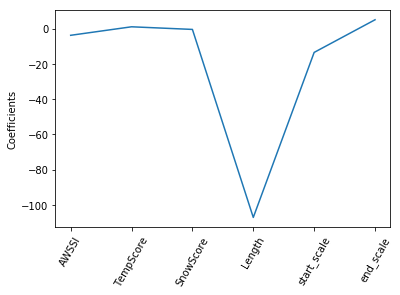

In [45]:
# default parameters

lasso = Lasso(alpha=1.0, tol=0.0001)
lasso_coef = lasso.fit(X, y).coef_ 
_ = plt.plot(range(len(names)), lasso_coef) 
_ = plt.xticks(range(len(names)), names, rotation=60) 
_ = plt.ylabel('Coefficients') 
plt.show()

##### Using default parameters (above), objective did not converge

C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


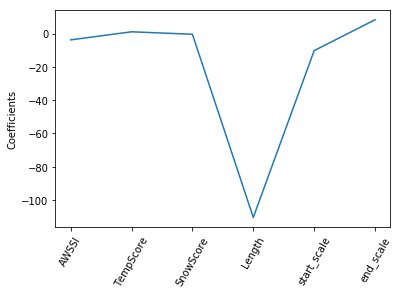

In [46]:
# using alpha from DataCamp example
lasso = Lasso(alpha=0.1) 
lasso_coef = lasso.fit(X, y).coef_ 
_ = plt.plot(range(len(names)), lasso_coef) 
_ = plt.xticks(range(len(names)), names, rotation=60) 
_ = plt.ylabel('Coefficients') 
plt.show()

##### Lowering alpha to 0.1 without other changes (above), did not converge

C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


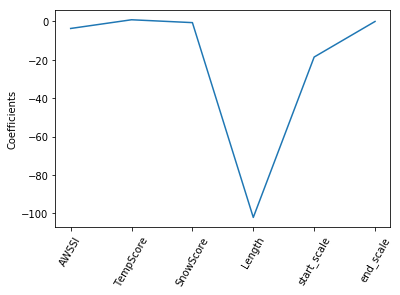

In [47]:
lasso = Lasso(alpha=0.1, max_iter = 100000, tol=0.0001)
lasso_coef = lasso.fit(X, y).coef_ 
_ = plt.plot(range(len(names)), lasso_coef) 
_ = plt.xticks(range(len(names)), names, rotation=60) 
_ = plt.ylabel('Coefficients') 
plt.show()

##### Lower alpha to .1, increase iterations, leave tolerance to default (above), did not converge

##### With default alpha and increased iterations, convergance (below)

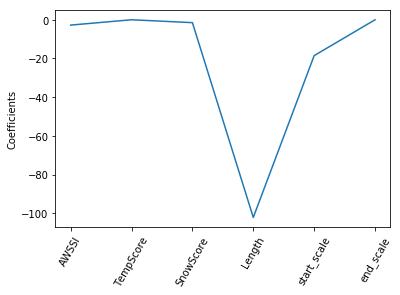

In [48]:
lasso = Lasso(alpha=1.0, max_iter = 100000, tol=0.0001) 
lasso_coef = lasso.fit(X, y).coef_ 
_ = plt.plot(range(len(names)), lasso_coef) 
_ = plt.xticks(range(len(names)), names, rotation=60) 
_ = plt.ylabel('Coefficients') 
plt.show()

#### 4a results and interpretation of lasso regression:
##### The feature Length is the most predictive feature for the target, Alcoholism admissions. Start scale is the second most predictive feature.

#### 4b. Apply the results of lasso regression: OLS with the two most predictive features, winter length and start of winter scale

In [49]:
# modify dataframe for this analysis
df = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_feats_1_targ", compression='infer')
df.head()

,AWSSI,TempScore,SnowScore,Length,start_scale,end_scale,Total_Admits
0,440,335,105,159,40,118,29526
1,788,364,424,164,36,127,31541
2,1052,426,626,127,27,99,32210
3,369,279,90,134,28,105,33411
4,1090,400,690,153,38,114,34559


In [50]:
df=df.drop(df.columns[0:3], axis=1)
df.head()

,Length,start_scale,end_scale,Total_Admits
0,159,40,118,29526
1,164,36,127,31541
2,127,27,99,32210
3,134,28,105,33411
4,153,38,114,34559


In [51]:
y = df['Total_Admits'].values

In [52]:
df = df.drop(df.columns[2:3], axis=1) 
df.head()

,Length,start_scale,Total_Admits
0,159,40,29526
1,164,36,31541
2,127,27,32210
3,134,28,33411
4,153,38,34559


In [53]:
X = df.drop(df.columns[2], axis=1).values 

In [54]:
print(X)
print(y)

[[159  40]
 [164  36]
 [127  27]
 [134  28]
 [153  38]
 [146  36]
 [148  37]
 [108  20]
 [149  20]
 [172  52]
 [147  20]
 [170  59]
 [166  59]
 [152  38]
 [159  52]
 [126  20]
 [131  31]
 [143  31]
 [160  64]
 [146  43]
 [133  55]
 [140  44]
 [155  38]]
[29526 31541 32210 33411 34559 35083 32965 30886 28948 26727 22670 18216
 20421 20734 37349 36572 32384 32079 31201 29715 30013 28841 27619]


In [55]:
y = y.reshape(-1, 1) 

In [56]:

X, y = X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("R^2: {:.2f}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

lr.coef_: [[-104.84843725  -59.81315593]]
lr.intercept_: [ 47749.62736287]
Training set score: 0.27
Test set score: -0.05
R^2: -0.05
Root Mean Squared Error: 6315.72


#### 4b. Results and interpretation:
##### lr.coef_: [[-104.84843725  -59.81315593]]
##### lr.intercept_: [ 47749.62736287
##### Training set score: 0.27
##### Test set score: -0.05
##### R^2: -0.05
##### Root Mean Squared Error: 6315.72. RMSE for this model, with only two of the six features, is almost 50% greater than the RMSE for the regression model using all available features. This is explained by the overfit of the all-feature model to the train data set. This model was more generalizable, with a R^2 that was greater than the overfitting all-feature model. However, this difference was only .02, and the two models are both beyond useless for predictive purposes, so the difference is essentially meaningless, and likely well with the error associated with the parameters.

#### 2e(2). Regression using the winter length feature, identified by the Lasso regression as being most predictive

In [57]:
df = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_feats_1_targ", compression='infer')
df.head()

,AWSSI,TempScore,SnowScore,Length,start_scale,end_scale,Total_Admits
0,440,335,105,159,40,118,29526
1,788,364,424,164,36,127,31541
2,1052,426,626,127,27,99,32210
3,369,279,90,134,28,105,33411
4,1090,400,690,153,38,114,34559


In [58]:
X1 = df.values 

In [59]:
X = X1[:,3] 

In [60]:
y = df['Total_Admits'].values

In [61]:
y = y.reshape(-1, 1) 
X = X.reshape(-1, 1)

In [62]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X, y = X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
y_pred = lr.predict(X_test)
print("R^2: {:.2f}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

lr.coef_: [[-141.97595305]]
lr.intercept_: [ 50966.49904765]
Training set score: 0.26
Test set score: -0.02
R^2: -0.02
Root Mean Squared Error: 6242.50


#### 2e(2) Regression using the most predictive feature, winter length, results and interpretation:

##### lr.coef_: [[-141.98]]
##### lr.intercept_: [ 50966.50]
##### Training set score: 0.26
##### Test set score: -0.02
##### R^2: -0.02
##### Root Mean Squared Error: 6242.50

##### Basically this is not different in any meaningful way than 2e(1), with the start date scale included as a feature.